In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from fbprophet import Prophet

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [164]:
df = pd.read_csv('history_hour.csv')
df['holiday'] = df['holiday'].fillna(False)
df['date'] = df['startDate'].apply(lambda x: datetime.fromtimestamp(x))
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['hour'] = df['date'].apply(lambda x: x.hour)
df['weekday'] = df['date'].apply(lambda x: x.weekday())
df['ds'] = df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df['date_day'] = df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df['hour_div2'] = df['hour'] // 2 * 2

df.head()

,startDate,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,visib,wind_dir,...,holiday,date,year,month,day,hour,weekday,ds,date_day,hour_div2
0,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,False,2016-01-04 15:00:00,2016,1,4,15,0,2016-01-04 15:00:00,2016-01-04,14
1,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,False,2016-01-04 15:00:00,2016,1,4,15,0,2016-01-04 15:00:00,2016-01-04,14
2,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,False,2016-01-04 15:00:00,2016,1,4,15,0,2016-01-04 15:00:00,2016-01-04,14
3,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,False,2016-01-04 15:00:00,2016,1,4,15,0,2016-01-04 15:00:00,2016-01-04,14
4,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,False,2016-01-04 15:00:00,2016,1,4,15,0,2016-01-04 15:00:00,2016-01-04,14


In [172]:
def convert_to_day_part(hour):
    if hour <= 12:
        return 0
    elif hour <= 16:
        return 1
    return 2

df2 = df[(df['hour'] >= 9) & (df['hour'] <= 20)]
df2['day_part'] = df['hour'].apply(convert_to_day_part)

/Users/marakulin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [165]:
df_slice = df[df['counterId'] == 1050]

In [213]:
len(df_slice)

30581

In [219]:
df = pd.read_csv('history_hour.csv')
df.head(10)

,startDate,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,visib,wind_dir,...,counterId,seqNumber,endDate,visits,counterIdPave,installationDate,parkCode,cordNorth,coordSouth,holiday
0,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1043,8874,1.451916e+09,0,149157,1.344895e+09,852,6687729,364641,False
1,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1050,8876,1.451916e+09,0,151989,1.350943e+09,852,6684826,359733,False
2,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,922,7337,1.451916e+09,0,125383,1.291154e+09,852,6690877,361577,False
3,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,912,6956,1.451916e+09,2,109144,1.282255e+09,852,6690448,361700,False
4,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1053,20709,1.451916e+09,33,190928,1.352153e+09,34361,7500953,381692,False
5,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1121,6578,1.451916e+09,4,190929,1.392329e+09,34361,7500660,383265,False
6,1.453514e+09,NaN,1028.2,94.0,0.0,25.0,-6.8,-7.5,13523.0,151.0,...,1053,21154,1.453518e+09,0,190928,1.352153e+09,34361,7500953,381692,False
7,1.453514e+09,NaN,1028.2,94.0,0.0,25.0,-6.8,-7.5,13523.0,151.0,...,1121,7023,1.453518e+09,0,190929,1.392329e+09,34361,7500660,383265,False
8,1.453514e+09,NaN,1028.2,94.0,0.0,25.0,-6.8,-7.5,13523.0,151.0,...,1043,9319,1.453518e+09,0,149157,1.344895e+09,852,6687729,364641,False
9,1.453514e+09,NaN,1028.2,94.0,0.0,25.0,-6.8,-7.5,13523.0,151.0,...,1050,9321,1.453518e+09,0,151989,1.350943e+09,852,6684826,359733,False


In [169]:
df2 = df_slice.groupby('hour').agg({'visits': 'mean'}).reset_index()
df2.head()

,hour,visits
0,0,0.041536
1,1,0.018809
2,2,0.003918
3,3,0.001571
4,4,0.000786


In [178]:
df2.columns

Index(['startDate', 'cloud', 'pressure', 'humidity', 'percip', 'show_depth',
       'temp', 'dewpoint', 'visib', 'wind_dir', 'gust_speed', 'wind_speed',
       'measurmentId', 'counterId', 'seqNumber', 'endDate', 'visits',
       'counterIdPave', 'installationDate', 'parkCode', 'cordNorth',
       'coordSouth', 'holiday', 'date', 'year', 'month', 'day', 'hour',
       'weekday', 'ds', 'date_day', 'hour_div2', 'day_part'],
      dtype='object')

In [220]:
df3.head()

,counterId,date_day,year,month,day_part,visits,cloud,pressure,humidity,percip,...,temp,dewpoint,visib,wind_dir,gust_speed,wind_speed,coordSouth,holiday,hours,ds
5359,912,2016-01-01,2016,1,0,12,8.0,1038.975,80.5,0.0,...,-5.525,-8.35,7334.0,100.25,7.3,4.65,361700,True,01:00,2016-01-01 01:00
9400,922,2016-01-01,2016,1,0,3,8.0,1038.975,80.5,0.0,...,-5.525,-8.35,7334.0,100.25,7.3,4.65,361577,True,01:00,2016-01-01 01:00
19964,1043,2016-01-01,2016,1,0,7,8.0,1038.975,80.5,0.0,...,-5.525,-8.35,7334.0,100.25,7.3,4.65,364641,True,01:00,2016-01-01 01:00
23825,1050,2016-01-01,2016,1,0,8,8.0,1038.975,80.5,0.0,...,-5.525,-8.35,7334.0,100.25,7.3,4.65,359733,True,01:00,2016-01-01 01:00
27649,1053,2016-01-01,2016,1,0,153,8.0,1038.975,80.5,0.0,...,-5.525,-8.35,7334.0,100.25,7.3,4.65,381692,True,01:00,2016-01-01 01:00


In [180]:
df3 = df2.groupby(['counterId', 'date_day', 'year', 'month', 'day_part']).agg({
    'visits': 'sum',
    'cloud': 'mean',
    'pressure': 'mean',
    'humidity': 'mean',
    'percip': 'mean',
    'show_depth': 'mean',
    'temp': 'mean',
    'dewpoint': 'mean',
    'visib': 'mean',
    'wind_dir': 'mean',
    'gust_speed': 'mean',
    'wind_speed': 'mean',
    'coordSouth': 'mean',
    'holiday': 'max'
}).reset_index().sort_values(['date_day', 'day_part'])

df3.head(20)

,counterId,date_day,year,month,day_part,visits,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,visib,wind_dir,gust_speed,wind_speed,coordSouth,holiday
5359,912,2016-01-01,2016,1,0,12,8.00,1038.975,80.50,0.0,4.25,-5.525,-8.35,7334.00,100.25,7.300,4.650,361700,True
9400,922,2016-01-01,2016,1,0,3,8.00,1038.975,80.50,0.0,4.25,-5.525,-8.35,7334.00,100.25,7.300,4.650,361577,True
19964,1043,2016-01-01,2016,1,0,7,8.00,1038.975,80.50,0.0,4.25,-5.525,-8.35,7334.00,100.25,7.300,4.650,364641,True
23825,1050,2016-01-01,2016,1,0,8,8.00,1038.975,80.50,0.0,4.25,-5.525,-8.35,7334.00,100.25,7.300,4.650,359733,True
27649,1053,2016-01-01,2016,1,0,153,8.00,1038.975,80.50,0.0,4.25,-5.525,-8.35,7334.00,100.25,7.300,4.650,381692,True
32922,1121,2016-01-01,2016,1,0,7,8.00,1038.975,80.50,0.0,4.25,-5.525,-8.35,7334.00,100.25,7.300,4.650,383265,True
5360,912,2016-01-01,2016,1,1,77,7.75,1039.900,77.00,0.0,5.00,-5.825,-9.25,10644.50,82.50,6.750,4.000,361700,True
9401,922,2016-01-01,2016,1,1,3,7.75,1039.900,77.00,0.0,5.00,-5.825,-9.25,10644.50,82.50,6.750,4.000,361577,True
19965,1043,2016-01-01,2016,1,1,17,7.75,1039.900,77.00,0.0,5.00,-5.825,-9.25,10644.50,82.50,6.750,4.000,364641,True
23826,1050,2016-01-01,2016,1,1,18,7.75,1039.900,77.00,0.0,5.00,-5.825,-9.25,10644.50,82.50,6.750,4.000,359733,True


In [181]:
df3.to_csv('data_day_part.csv', index=False)

In [109]:
import seaborn as sns
sns.set()

In [223]:
df = pd.read_csv('history_daily.csv')
df.head()

/Users/marakulin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parkCode,counterIdPave,date_day,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,...,Duration[min],Fireplace,Shelter,Toilet,InfoHut,DrinkingWater,Recycling,Parking,Restaurant,BusStop
0,852,109144,2016-01-01,7.636364,1039.872727,78.636364,0.000000,4.727273,-5.800000,-8.936364,...,NaN,1,1,1,1,1,1,1,0,1
1,852,109144,2016-01-02,7.272727,1045.618182,89.818182,0.000000,8.818182,-9.554545,-10.900000,...,NaN,1,1,1,1,1,1,1,0,1
2,852,109144,2016-01-03,6.818182,1020.927273,89.727273,0.127273,8.818182,-9.509091,-10.854545,...,NaN,1,1,1,1,1,1,1,0,1
3,852,109144,2016-01-04,3.000000,1013.809091,87.090909,0.000000,14.454545,-14.709091,-16.400000,...,NaN,1,1,1,1,1,1,1,0,1
4,852,109144,2016-01-05,5.454545,1009.063636,83.090909,0.000000,12.818182,-18.718182,-20.872727,...,NaN,1,1,1,1,1,1,1,0,1


In [110]:
rcParams['figure.figsize'] = 12, 7

In [221]:
df3_split = df3[df3.counterId == 1050]

len(df3_split)

df3_split.head()

,counterId,date_day,year,month,day_part,visits,cloud,pressure,humidity,percip,...,temp,dewpoint,visib,wind_dir,gust_speed,wind_speed,coordSouth,holiday,hours,ds
23825,1050,2016-01-01,2016,1,0,8,8.00,1038.975,80.50,0.0,...,-5.525,-8.350,7334.00,100.25,7.300,4.650,359733,True,01:00,2016-01-01 01:00
23826,1050,2016-01-01,2016,1,1,18,7.75,1039.900,77.00,0.0,...,-5.825,-9.250,10644.50,82.50,6.750,4.000,359733,True,09:00,2016-01-01 09:00
23827,1050,2016-01-01,2016,1,2,0,7.00,1041.400,78.75,0.0,...,-6.475,-9.550,25075.75,96.50,7.850,4.800,359733,True,17:00,2016-01-01 17:00
23828,1050,2016-01-02,2016,1,0,9,7.50,1046.275,90.00,0.0,...,-8.275,-9.650,1841.25,112.50,5.625,3.225,359733,False,01:00,2016-01-02 01:00
23829,1050,2016-01-02,2016,1,1,9,7.25,1045.900,89.50,0.0,...,-9.825,-11.225,4852.50,84.75,3.425,2.325,359733,False,09:00,2016-01-02 09:00


In [3]:
df2 = df[(df['hour'] > 8) & (df['hour'] < 20)].drop(['startDate', 'endDate'], axis=1)
df2 = df2.groupby(['parkCode', 'counterIdPave', 'date_day']).agg({
    'cloud': 'mean',
    'pressure': 'mean',
    'humidity': 'mean',
    'percip': 'mean',
    'show_depth': 'mean',
    'temp': 'mean',
    'dewpoint': 'mean',
    'visib': 'mean',
    'wind_dir': 'mean',
    'gust_speed': 'mean',
    'wind_speed': 'mean',
    'visits': 'sum',
    'cordNorth': 'mean',
    'coordSouth': 'mean',
    'year': 'mean',
    'month': 'mean',
    'day': 'mean',
    'holiday': 'max',
    'counterId': 'first'
}).reset_index()

df2.head()

,parkCode,counterIdPave,date_day,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,...,gust_speed,wind_speed,visits,cordNorth,coordSouth,year,month,day,holiday,counterId
0,852,51257,2016-04-04,0.0,1017.8,51.0,0.0,13.0,6.9,-2.4,...,5.2,3.0,8345,6688414,362627,2016,4,4,False,149
1,852,51257,2016-05-02,1.0,1024.7,31.0,0.0,-1.0,16.9,-0.4,...,3.4,1.4,3767,6688414,362627,2016,5,2,False,149
2,852,51257,2016-05-07,0.0,1023.5,51.0,0.0,-1.0,14.7,4.8,...,5.4,2.7,1110,6688414,362627,2016,5,7,False,149
3,852,51257,2016-05-11,3.0,1018.5,43.0,0.0,-1.0,11.0,-1.0,...,4.1,1.9,289,6688414,362627,2016,5,11,False,149
4,852,51257,2016-05-12,0.0,1011.8,55.0,0.0,-1.0,8.6,0.1,...,3.8,2.4,186,6688414,362627,2016,5,12,False,149


In [4]:
df3 = pd.read_csv('Nuuksio_Counter_NearbyRoutesFeatures.csv', sep=';')
df3['counterId'] = df3['ASTA_Counters.NationalParkCode']
df3 = df3.drop(['ASTA_Counters.NationalParkCode', 'EPSG4326_East', 'EPSG4326_North'], axis=1)

df4 = pd.read_csv('PallasYllas_Counter_NearbyRoutesFeatures_noA.csv', sep=';')
df4['counterId'] = df4['ASTA_Counters.NationalParkCode']
df4 = df4.drop(['ASTA_Counters.NationalParkCode', 'EPSG4326_East', 'EPSG4326_North'], axis=1)

df5 = pd.concat([df3, df4])

df5

,Track_name[starts nearby],Difficulty,Length[km],Duration[min],Fireplace,Shelter,Toilet,InfoHut,DrinkingWater,Recycling,Parking,Restaurant,BusStop,counterId
0,Other (big parking place),Easy,NaN,NaN,1,1,1,1,1,1,1,0,1,912
1,Takalan polku,Easy,3,50.0,1,1,1,1,1,1,1,0,1,922
2,Yhdysreitti Haukkalampi-Haltia,Extreme,"4,6",120.0,0,0,1,0,1,1,1,0,1,1043
3,Kaarniaispolku,Easy,"2,7",60.0,0,0,0,0,0,0,1,0,1,1050
4,Other short track,NaN,3,NaN,0,0,0,0,0,0,1,0,0,1225
5,Soidinkierros,Easy,4,120.0,0,0,0,0,0,0,0,1,1,1246
0,NaN,Easy,NaN,NaN,1,1,1,1,1,1,1,1,0,672
1,NaN,Easy,NaN,NaN,1,1,1,1,1,1,1,1,0,689
2,NaN,Medium,NaN,NaN,1,1,1,0,1,0,0,0,0,817
3,NaN,Medium,NaN,NaN,1,1,1,0,1,0,0,0,0,831


In [224]:
df = pd.read_csv('history_hour.csv')
df.head()

,startDate,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,visib,wind_dir,...,counterId,seqNumber,endDate,visits,counterIdPave,installationDate,parkCode,cordNorth,coordSouth,holiday
0,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1043,8874,1.451916e+09,0,149157,1.344895e+09,852,6687729,364641,False
1,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1050,8876,1.451916e+09,0,151989,1.350943e+09,852,6684826,359733,False
2,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,922,7337,1.451916e+09,0,125383,1.291154e+09,852,6690877,361577,False
3,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,912,6956,1.451916e+09,2,109144,1.282255e+09,852,6690448,361700,False
4,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1053,20709,1.451916e+09,33,190928,1.352153e+09,34361,7500953,381692,False


In [225]:
df.parkCode.unique()

array([  852, 34361])

In [44]:
df5['Length[km]'] = df5['Length[km]'].apply(lambda x: x if isinstance(x, float) else float(x.replace(',', '.')))
df5.head()

,Track_name[starts nearby],Difficulty,Length[km],Duration[min],Fireplace,Shelter,Toilet,InfoHut,DrinkingWater,Recycling,Parking,Restaurant,BusStop,counterId
0,Other (big parking place),Easy,NaN,NaN,1,1,1,1,1,1,1,0,1,912
1,Takalan polku,Easy,3.0,50.0,1,1,1,1,1,1,1,0,1,922
2,Yhdysreitti Haukkalampi-Haltia,Extreme,4.6,120.0,0,0,1,0,1,1,1,0,1,1043
3,Kaarniaispolku,Easy,2.7,60.0,0,0,0,0,0,0,1,0,1,1050
4,Other short track,NaN,3.0,NaN,0,0,0,0,0,0,1,0,0,1225


In [52]:
df = pd.read_csv('result_holiday.csv')
df.head()

,startDate,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,visib,wind_dir,...,counterId,seqNumber,endDate,visits,counterIdPave,installationDate,parkCode,cordNorth,coordSouth,holiday
0,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1043,8874,1.451916e+09,0,149157,1.344895e+09,852,6687729,364641,False
1,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1050,8876,1.451916e+09,0,151989,1.350943e+09,852,6684826,359733,False
2,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,922,7337,1.451916e+09,0,125383,1.291154e+09,852,6690877,361577,False
3,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,912,6956,1.451916e+09,2,109144,1.282255e+09,852,6690448,361700,False
4,1.451912e+09,7.0,1013.4,88.0,0.0,15.0,-14.2,-15.8,15012.0,13.0,...,1053,20709,1.451916e+09,33,190928,1.352153e+09,34361,7500953,381692,False


In [50]:
temps = [8, 6, 7, 7, 4, 2, 2, 1, 4, 4]

results = []
for counterId in df5.counterId.unique():
    for idx, date in enumerate(['2019-11-17', '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
                 '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25', '2019-11-26']):
        row = {'date': date, 'counterId': counterId, 'temp': temps[idx]}
        results.append(row)

df10 = pd.DataFrame(results)
df10.to_csv('future_temp_10d.csv', index=False)

In [46]:
df5.to_csv('trials_static.csv', index=False)

In [5]:
df4 = df2.merge(df5, on='counterId')
df4.to_csv('final.csv', index=False)

In [6]:
fin = pd.read_csv('final.csv')
fin.head()

/Users/marakulin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parkCode,counterIdPave,date_day,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,...,Duration[min],Fireplace,Shelter,Toilet,InfoHut,DrinkingWater,Recycling,Parking,Restaurant,BusStop
0,852,109144,2016-01-01,7.636364,1039.872727,78.636364,0.000000,4.727273,-5.800000,-8.936364,...,NaN,1,1,1,1,1,1,1,0,1
1,852,109144,2016-01-02,7.272727,1045.618182,89.818182,0.000000,8.818182,-9.554545,-10.900000,...,NaN,1,1,1,1,1,1,1,0,1
2,852,109144,2016-01-03,6.818182,1020.927273,89.727273,0.127273,8.818182,-9.509091,-10.854545,...,NaN,1,1,1,1,1,1,1,0,1
3,852,109144,2016-01-04,3.000000,1013.809091,87.090909,0.000000,14.454545,-14.709091,-16.400000,...,NaN,1,1,1,1,1,1,1,0,1
4,852,109144,2016-01-05,5.454545,1009.063636,83.090909,0.000000,12.818182,-18.718182,-20.872727,...,NaN,1,1,1,1,1,1,1,0,1


In [ ]:
from sklearn.metrics import mean_squared_error

In [182]:
df3.head()

,counterId,date_day,year,month,day_part,visits,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,visib,wind_dir,gust_speed,wind_speed,coordSouth,holiday
5359,912,2016-01-01,2016,1,0,12,8.0,1038.975,80.5,0.0,4.25,-5.525,-8.35,7334.0,100.25,7.3,4.65,361700,True
9400,922,2016-01-01,2016,1,0,3,8.0,1038.975,80.5,0.0,4.25,-5.525,-8.35,7334.0,100.25,7.3,4.65,361577,True
19964,1043,2016-01-01,2016,1,0,7,8.0,1038.975,80.5,0.0,4.25,-5.525,-8.35,7334.0,100.25,7.3,4.65,364641,True
23825,1050,2016-01-01,2016,1,0,8,8.0,1038.975,80.5,0.0,4.25,-5.525,-8.35,7334.0,100.25,7.3,4.65,359733,True
27649,1053,2016-01-01,2016,1,0,153,8.0,1038.975,80.5,0.0,4.25,-5.525,-8.35,7334.0,100.25,7.3,4.65,381692,True


In [188]:
df3['hours'] = np.where(df3['day_part'] == 0, '01:00',
        np.where(df3['day_part'] == 1, '09:00',
                np.where(df3['day_part'] == 2, '17:00', df3['day_part'])))

In [189]:
df3['ds'] = df3['date_day'] + " " + df3['hours']

In [207]:
split_time = 800

fin = df3

df_split = fin[fin['counterId'] == counterId]

df_proph = df_split[['visits', 'ds']]
df_proph['y'] = df_proph['visits']
df_proph = df_proph.drop(['visits'], axis=1)
df_proph = df_proph.sort_values(['ds'])

df_proph_train = df_proph.iloc[:split_time]
df_proph_test = df_proph.iloc[split_time:]

m = Prophet()
m.fit(df_proph_train)

future = df_proph_test[['ds']]

forecast = m.predict(future)
# forecast['y'] = df_split['visits'].values

#     forecast_clean = forecast.dropna()
#     mse = mean_squared_error(forecast_clean['y'], forecast_clean['yhat'])
#     rmse = np.sqrt(mse)
#     avg = np.mean(forecast_clean['y'])

# features = df_split.drop(['parkCode', 'counterIdPave', 'date_day', 'year', 'counterId',
#                       'Track_name[starts nearby]', 'Difficulty', 'Length[km]',
#                       'Duration[min]', 'Fireplace', 'Shelter', 'Toilet', 'InfoHut', 'DrinkingWater',
#                       'Recycling', 'Parking', 'Restaurant', 'BusStop'], axis=1)
# features['holiday'] = features['holiday'].astype(int)
# features['yhat'] = forecast['y']
# features = features.fillna(0)

/Users/marakulin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/marakulin/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


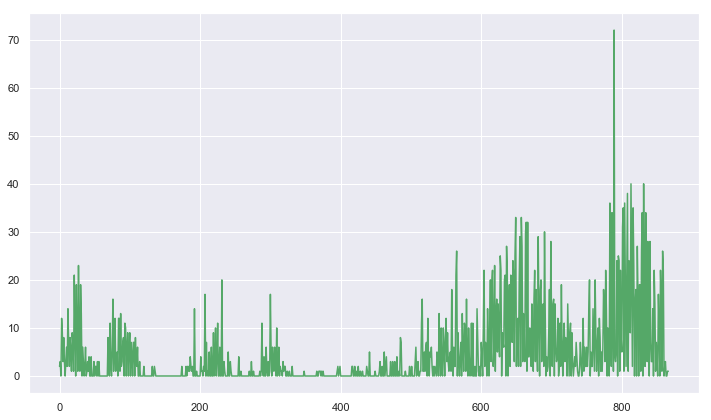

In [211]:
plt.plot(df_split['visits'].values, 'g')
plt.show()

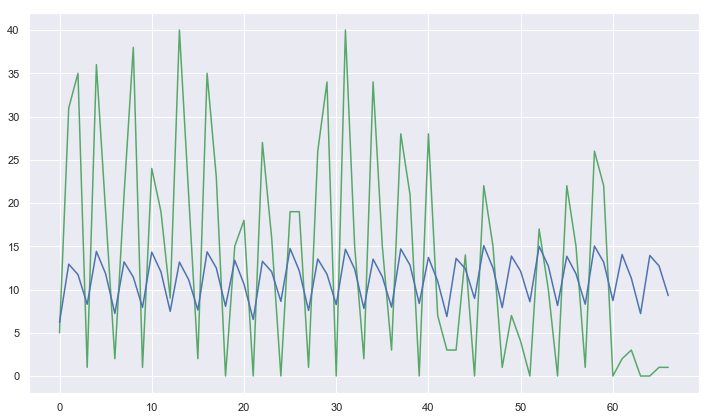

In [208]:
plt.plot(df_proph_test['y'].values, 'g')
plt.plot(forecast['yhat'].values, 'b')
plt.show()

In [ ]:
split_time = 1300

for counterId in fin['counterId'].unique():
    df_split = fin[fin['counterIdPave'] == counterId]
    
    df_proph = df_split[['visits', 'date_day']]
    df_proph['y'] = df_proph['visits']
    df_proph['ds'] = df_proph['date_day']
    df_proph = df_proph.drop(['visits', 'date_day'], axis=1)
    df_proph = df_proph.sort_values(['ds'])
    
    df_proph_train = df_proph.iloc[:split_time]
    df_proph_test = df_proph.iloc[split_time:]
    
    m = Prophet()
    m.fit(df_proph_train)
    
    future = df_split[['date_day']]
    future['ds'] = future['date_day']
    future.drop('date_day', axis=1)
    
    forecast = m.predict(future)
    forecast['y'] = df_split['visits'].values
    
#     forecast_clean = forecast.dropna()
#     mse = mean_squared_error(forecast_clean['y'], forecast_clean['yhat'])
#     rmse = np.sqrt(mse)
#     avg = np.mean(forecast_clean['y'])
    
    features = df_split.drop(['parkCode', 'counterIdPave', 'date_day', 'year', 'counterId',
                          'Track_name[starts nearby]', 'Difficulty', 'Length[km]',
                          'Duration[min]', 'Fireplace', 'Shelter', 'Toilet', 'InfoHut', 'DrinkingWater',
                          'Recycling', 'Parking', 'Restaurant', 'BusStop'], axis=1)
    features['holiday'] = features['holiday'].astype(int)
    features['yhat'] = forecast['y']
    features = features.fillna(0)

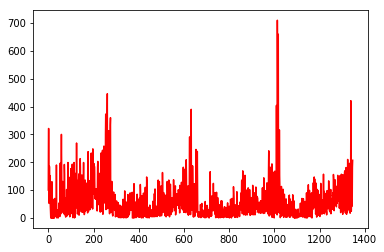

In [11]:
plt.plot(df_proph['y'].values, 'r')
plt.show()

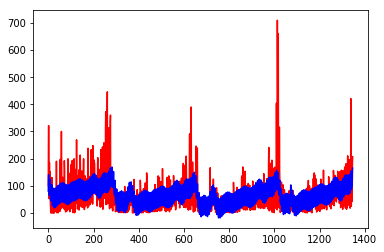

In [12]:
plt.plot(df_split['visits'].values, 'r')
plt.plot(forecast['yhat'].values, 'b')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
forecast_clean = forecast.dropna()
mse = mean_squared_error(forecast_clean['y'], forecast_clean['yhat'])
rmse = np.sqrt(mse)
avg = np.mean(forecast_clean['y'])
print(avg, rmse)

53.201187824795845 49.98447371633009


In [23]:
features = df_split.drop(['parkCode', 'counterIdPave', 'date_day', 'year', 'counterId',
                          'Track_name[starts nearby]', 'Difficulty', 'Length[km]',
                          'Duration[min]', 'Fireplace', 'Shelter', 'Toilet', 'InfoHut', 'DrinkingWater',
                          'Recycling', 'Parking', 'Restaurant', 'BusStop'], axis=1)
features['holiday'] = features['holiday'].astype(int)
features['yhat'] = forecast['y']
features = features.fillna(0)

print(len(features))

features.head()

1347


,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,visib,wind_dir,gust_speed,wind_speed,visits,cordNorth,coordSouth,month,day,holiday,yhat
0,7.636364,1039.872727,78.636364,0.000000,4.727273,-5.800000,-8.936364,12679.000000,91.818182,7.245455,4.436364,100,6690448,361700,1,1,1,100
1,7.272727,1045.618182,89.818182,0.000000,8.818182,-9.554545,-10.900000,5692.363636,106.090909,4.609091,2.663636,321,6690448,361700,1,2,0,321
2,6.818182,1020.927273,89.727273,0.127273,8.818182,-9.509091,-10.854545,12411.636364,249.181818,4.136364,2.181818,321,6690448,361700,1,3,0,321
3,3.000000,1013.809091,87.090909,0.000000,14.454545,-14.709091,-16.400000,18964.181818,44.909091,6.518182,3.218182,114,6690448,361700,1,4,0,114
4,5.454545,1009.063636,83.090909,0.000000,12.818182,-18.718182,-20.872727,15823.818182,76.272727,7.509091,3.754545,52,6690448,361700,1,5,0,52


In [24]:
df_train_gbm = features[:1100]
df_test_gbm = features[1100:]

In [34]:
features.tail()

,cloud,pressure,humidity,percip,show_depth,temp,dewpoint,visib,wind_dir,gust_speed,wind_speed,visits,cordNorth,coordSouth,month,day,holiday,yhat
1342,6.090909,1000.036364,83.909091,0.000000,-1.0,6.209091,3.663636,50000.000000,80.727273,4.818182,2.463636,41,6690448,361700,10,2,0,41
1343,8.000000,1010.718182,93.363636,0.181818,-1.0,3.563636,2.581818,20042.636364,25.272727,8.327273,4.072727,48,6690448,361700,10,3,0,48
1344,5.727273,1011.281818,90.090909,0.000000,-1.0,2.127273,0.663636,46217.181818,337.272727,6.100000,2.900000,54,6690448,361700,10,4,0,54
1345,6.272727,1018.536364,74.818182,0.000000,-1.0,3.036364,-1.090909,50000.000000,316.545455,5.154545,2.681818,182,6690448,361700,10,5,0,182
1346,7.727273,1019.072727,86.909091,0.000000,-1.0,3.881818,1.854545,47898.272727,315.454545,3.636364,1.981818,207,6690448,361700,10,6,0,207


In [32]:
future = m.make_future_dataframe(periods=10, include_history=False)
future

,ds
0,2019-08-21
1,2019-08-22
2,2019-08-23
3,2019-08-24
4,2019-08-25
5,2019-08-26
6,2019-08-27
7,2019-08-28
8,2019-08-29
9,2019-08-30


In [25]:
import lightgbm as lgb

In [26]:
X_train.columns

Index(['cloud', 'pressure', 'humidity', 'percip', 'show_depth', 'temp',
       'dewpoint', 'visib', 'wind_dir', 'gust_speed', 'wind_speed',
       'cordNorth', 'coordSouth', 'month', 'day', 'holiday'],
      dtype='object')

In [27]:
y_train = df_train_gbm['visits']
X_train = df_train_gbm.drop('visits', axis=1)
y_test = df_test_gbm['visits']
X_test = df_test_gbm.drop('visits', axis=1)


gbm = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='f1',
        early_stopping_rounds=5)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Feature importances:', list(gbm.feature_importances_))

sorted([(feat, val) for feat, val in zip(X_train.columns, list(gbm.feature_importances_))], key=lambda x: x[1])

[1]	valid_0's l2: 2464.73
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 2230.01
[3]	valid_0's l2: 2017.89
[4]	valid_0's l2: 1827.58
[5]	valid_0's l2: 1654.94
[6]	valid_0's l2: 1499.75
[7]	valid_0's l2: 1359.73
[8]	valid_0's l2: 1233.97
[9]	valid_0's l2: 1118.59
[10]	valid_0's l2: 1016.69
[11]	valid_0's l2: 922.652
[12]	valid_0's l2: 838.179
[13]	valid_0's l2: 760.948
[14]	valid_0's l2: 692.926
[15]	valid_0's l2: 629.492
[16]	valid_0's l2: 571.91
[17]	valid_0's l2: 520.446
[18]	valid_0's l2: 474.201
[19]	valid_0's l2: 431.6
[20]	valid_0's l2: 393.158
Did not meet early stopping. Best iteration is:
[20]	valid_0's l2: 393.158
The rmse of prediction is: 19.828221511599708
Feature importances: [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 597]


[('cloud', 0),
 ('pressure', 0),
 ('percip', 0),
 ('show_depth', 0),
 ('temp', 0),
 ('dewpoint', 0),
 ('gust_speed', 0),
 ('wind_speed', 0),
 ('cordNorth', 0),
 ('coordSouth', 0),
 ('month', 0),
 ('day', 0),
 ('holiday', 0),
 ('humidity', 1),
 ('visib', 1),
 ('wind_dir', 1),
 ('yhat', 597)]